In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

In [2]:
def load_file(filepath):
    return pd.read_csv(filepath, header=None, delim_whitespace=True).values

def load_group(files, prefix=''):
    loaded = list()
    for f in files:
        data = load_file(prefix + f)
        loaded.append(data)
    # Stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/X_train/'
    # Load all 9 files as a single array
    files = list()
    # body acceleration
    files += ['acc_x_' + group + '.txt', 'acc_y_' + group + '.txt', 'acc_z_' + group + '.txt']
    # body gyroscope
    files += ['gyro_x_' + group + '.txt', 'gyro_y_' + group + '.txt', 'gyro_z_' + group + '.txt']
    # Load input data
    X = load_group(files, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

def load_dataset_group1(group, prefix=''):
    filepath = prefix + group + '/X_test/'
    # Load all 9 files as a single array
    files = list()
    # body acceleration
    files += ['acc_x_' + group + '.txt', 'acc_y_' + group + '.txt', 'acc_z_' + group + '.txt']
    # body gyroscope
    files += ['gyro_x_' + group + '.txt', 'gyro_y_' + group + '.txt', 'gyro_z_' + group + '.txt']
    # Load input data
    X = load_group(files, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_' + group + '.txt')
    return X, y

def load_dataset(prefix=''):
    # Load all train
    X_train, y_train = load_dataset_group('train', prefix)
    # Load all test
    X_test, y_test = load_dataset_group1('test', prefix)
    # zero-offset class values
    y_train = y_train - 1
    y_test = y_test - 1
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print(f"""Dataset loaded.
Training Set:
X_train {X_train.shape} y_train {y_train.shape}
Test:
X_test {X_test.shape} y_test {y_test.shape}""")
    return X_train, y_train, X_test, y_test

# Usage:
X_train, y_train, X_test, y_test = load_dataset(prefix="C:/Users/ASHWITHA PN/Downloads/CS5062_AssessmentII_Dataset/CS5062_AssessmentII_Dataset/")

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]


Dataset loaded.
Training Set:
X_train (7352, 128, 6) y_train (7352, 6)
Test:
X_test (2947, 128, 6) y_test (2947, 6)


In [39]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler for each feature
scalers = {}

for i in range(X_train.shape[2]):
    scalers[i] = MinMaxScaler()
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 
    X_test[:, :, i] = scalers[i].transform(X_test[:, :, i])

In [115]:
num_classes = 6
n_timesteps = 128
n_features = 6
num_classes=n_outputs

In [59]:
#simple rnn
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(n_timesteps, n_features), return_sequences=False))  
model_rnn.add(Dense(n_outputs, activation='softmax'))

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
230/230 [==============================] - 6s 20ms/step - loss: 1.5433 - accuracy: 0.3289 - val_loss: 1.5299 - val_accuracy: 0.3373
Epoch 2/25
230/230 [==============================] - 5s 22ms/step - loss: 1.3251 - accuracy: 0.4402 - val_loss: 1.4906 - val_accuracy: 0.3760
Epoch 3/25
230/230 [==============================] - 5s 20ms/step - loss: 1.2712 - accuracy: 0.4581 - val_loss: 1.3292 - val_accuracy: 0.3709
Epoch 4/25
230/230 [==============================] - 5s 21ms/step - loss: 1.2948 - accuracy: 0.4422 - val_loss: 1.2300 - val_accuracy: 0.4768
Epoch 5/25
230/230 [==============================] - 6s 25ms/step - loss: 1.1580 - accuracy: 0.4777 - val_loss: 1.2338 - val_accuracy: 0.5022
Epoch 6/25
230/230 [==============================] - 6s 26ms/step - loss: 1.1700 - accuracy: 0.4842 - val_loss: 1.3772 - val_accuracy: 0.3437
Epoch 7/25
230/230 [==============================] - 6s 25ms/step - loss: 1.1837 - accuracy: 0.4763 - val_loss: 1.1627 - val_accuracy: 0.4849

In [60]:
loss, accuracy = model_rnn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

93/93 [==============================] - 1s 9ms/step - loss: 0.4874 - accuracy: 0.8300
Test Loss: 0.48742544651031494
Test Accuracy: 0.8299965858459473


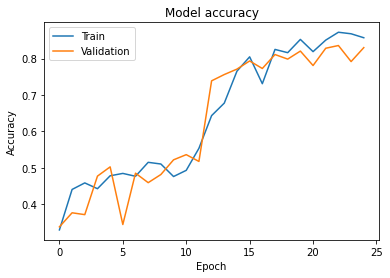

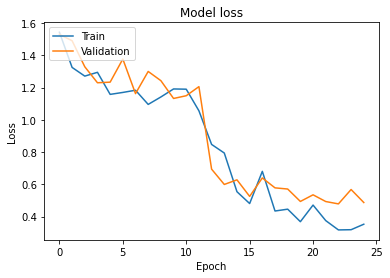

In [68]:
# Plot training accuracy & loss for RNN 
plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

93/93 [==============================] - 1s 13ms/step


<AxesSubplot:>

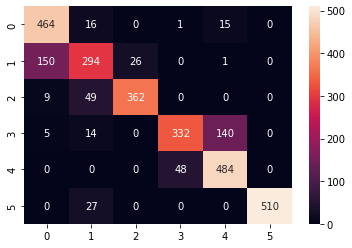

In [69]:
#confusion matrix for  RNN
y_pred = model_rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [75]:
# Obtain predictions for RNN 
y_pred_probs = model_rnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
# Precision, Recall, and F1 Score
precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
# Accuracy
acc = accuracy_score(y_true, y_pred)
# AUROC
# For multi-class, we will consider a micro-average
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='micro')
print(f"RNN Model Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Area Under the Curve (AUROC): {roc_auc:.4f}")

93/93 [==============================] - 1s 12ms/step
RNN Model Metrics:
Precision: 0.8391
Recall: 0.8262
Accuracy: 0.8300
Area Under the Curve (AUROC): 0.9753


In [66]:
model_lstm = Sequential()
# Input LSTM layer
model_lstm.add(LSTM(100, input_shape=(n_timesteps, n_features), return_sequences=True)) 
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(50, activation='relu')) 
model_lstm.add(Dense(n_outputs, activation='softmax'))

# Compilation
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
230/230 [==============================] - 46s 185ms/step - loss: 1.2332 - accuracy: 0.4572 - val_loss: 1.2886 - val_accuracy: 0.4564
Epoch 2/25
230/230 [==============================] - 54s 235ms/step - loss: 1.1548 - accuracy: 0.4965 - val_loss: 1.3404 - val_accuracy: 0.4106
Epoch 3/25
230/230 [==============================] - 53s 230ms/step - loss: 1.0455 - accuracy: 0.5374 - val_loss: 1.1727 - val_accuracy: 0.5368
Epoch 4/25
230/230 [==============================] - 53s 231ms/step - loss: 1.0254 - accuracy: 0.5668 - val_loss: 2.2690 - val_accuracy: 0.3841
Epoch 5/25
230/230 [==============================] - 54s 235ms/step - loss: 1.1677 - accuracy: 0.4871 - val_loss: 1.4600 - val_accuracy: 0.3410
Epoch 6/25
230/230 [==============================] - 60s 261ms/step - loss: 1.2735 - accuracy: 0.4370 - val_loss: 1.1421 - val_accuracy: 0.4863
Epoch 7/25
230/230 [==============================] - 69s 300ms/step - loss: 1.0478 - accuracy: 0.5275 - val_loss: 1.2351 - val_ac

In [67]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

93/93 [==============================] - 7s 77ms/step - loss: 0.3965 - accuracy: 0.8588
Test Loss: 0.39651262760162354
Test Accuracy: 0.8588395118713379


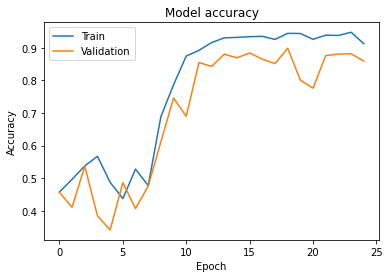

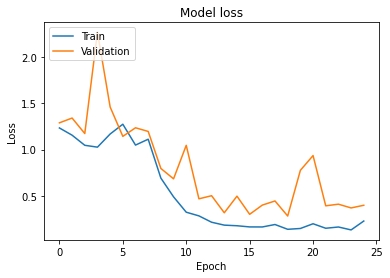

In [91]:
# Plot training accuracy & loss for LSTM
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

93/93 [==============================] - 7s 70ms/step


<AxesSubplot:>

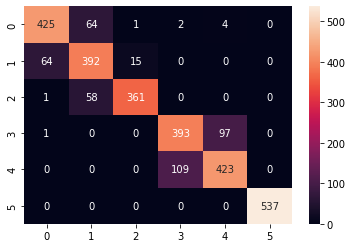

In [90]:
#confusion matrix for LSTM
y_pred = model_lstm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [74]:
# Obtain predictions for LSTM model
y_pred_probs_lstm = model_lstm.predict(X_test)
y_pred_lstm = np.argmax(y_pred_probs_lstm, axis=1)
y_true_lstm = np.argmax(y_test, axis=1)

# Precision, Recall, and F1 Score
precision_lstm, recall_lstm, _, _ = precision_recall_fscore_support(y_true_lstm, y_pred_lstm, average='macro')

# Accuracy
acc_lstm = accuracy_score(y_true_lstm, y_pred_lstm)

# AUROC
# For multi-class, we will consider a micro-average
roc_auc_lstm = roc_auc_score(y_test, y_pred_probs_lstm, multi_class='ovr', average='micro')

print(f"LSTM Model Metrics:")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"Accuracy: {acc_lstm:.4f}")
print(f"Area Under the Curve (AUROC): {roc_auc_lstm:.4f}")

93/93 [==============================] - 7s 76ms/step
LSTM Model Metrics:
Precision: 0.8621
Recall: 0.8574
Accuracy: 0.8588
Area Under the Curve (AUROC): 0.9835


In [87]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2] 
# Create the Bi-directional RNN model 
model_bidir_rnn = Sequential()
model_bidir_rnn.add(Bidirectional(SimpleRNN(64, return_sequences=False), input_shape=(n_timesteps, n_features)))
model_bidir_rnn.add(Dense(50, activation='relu'))  # Dense layer with ReLU activation
model_bidir_rnn.add(Dense(n_outputs, activation='softmax'))
model_bidir_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_bidir_rnn = model_bidir_rnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
230/230 [==============================] - 18s 66ms/step - loss: 1.2535 - accuracy: 0.4486 - val_loss: 1.2986 - val_accuracy: 0.4377
Epoch 2/25
230/230 [==============================] - 15s 64ms/step - loss: 1.0745 - accuracy: 0.5290 - val_loss: 1.3139 - val_accuracy: 0.4703
Epoch 3/25
230/230 [==============================] - 15s 64ms/step - loss: 1.2091 - accuracy: 0.4694 - val_loss: 1.2714 - val_accuracy: 0.4829
Epoch 4/25
230/230 [==============================] - 15s 65ms/step - loss: 1.1057 - accuracy: 0.5112 - val_loss: 1.2122 - val_accuracy: 0.4639
Epoch 5/25
230/230 [==============================] - 15s 63ms/step - loss: 1.0857 - accuracy: 0.5324 - val_loss: 1.1685 - val_accuracy: 0.5073
Epoch 6/25
230/230 [==============================] - 15s 63ms/step - loss: 1.0263 - accuracy: 0.5616 - val_loss: 1.0676 - val_accuracy: 0.5769
Epoch 7/25
230/230 [==============================] - 14s 63ms/step - loss: 0.8973 - accuracy: 0.6376 - val_loss: 0.8008 - val_accuracy:

In [88]:
loss, accuracy = model_bidir_rnn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

93/93 [==============================] - 2s 18ms/step - loss: 0.6567 - accuracy: 0.8029
Test Loss: 0.6567110419273376
Test Accuracy: 0.8028503656387329


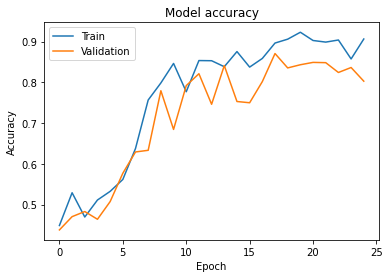

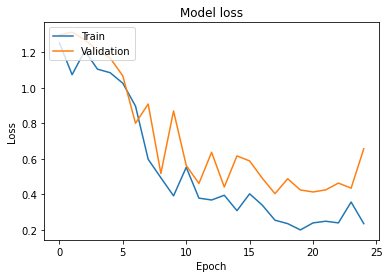

In [89]:
# Plot training accuracy & loss for Bi-directional RNN
plt.plot(history_bidir_rnn.history['accuracy'])
plt.plot(history_bidir_rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_bidir_rnn.history['loss'])
plt.plot(history_bidir_rnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

93/93 [==============================] - 2s 16ms/step


<AxesSubplot:>

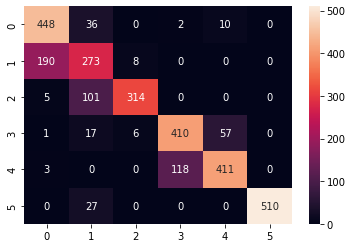

In [92]:
#confusion matrix for bi-directional RNN
y_pred = model_bidir_rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [93]:
# Obtain predictions for bi- directional RNN 
y_pred_probs = model_bidir_rnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
# Precision, Recall, and F1 Score
precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
# Accuracy
acc = accuracy_score(y_true, y_pred)
# AUROC
# For multi-class, we will consider a micro-average
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='micro')
print(f"Bi-Directional RNN Model Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Area Under the Curve (AUROC): {roc_auc:.4f}")

93/93 [==============================] - 1s 16ms/step
Bi-Directional RNN Model Metrics:
Precision: 0.8141
Recall: 0.7980
Accuracy: 0.8029
Area Under the Curve (AUROC): 0.9686


In [104]:
# Create the 1D CNN model
model_cnn = Sequential()
# Convolutional layer
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(n_outputs, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
230/230 [==============================] - 4s 11ms/step - loss: 0.5108 - accuracy: 0.7933 - val_loss: 0.5148 - val_accuracy: 0.8144
Epoch 2/25
230/230 [==============================] - 2s 9ms/step - loss: 0.2275 - accuracy: 0.9143 - val_loss: 0.4546 - val_accuracy: 0.8558
Epoch 3/25
230/230 [==============================] - 2s 9ms/step - loss: 0.1635 - accuracy: 0.9385 - val_loss: 0.4636 - val_accuracy: 0.8643
Epoch 4/25
230/230 [==============================] - 2s 10ms/step - loss: 0.1352 - accuracy: 0.9442 - val_loss: 0.5037 - val_accuracy: 0.8717
Epoch 5/25
230/230 [==============================] - 2s 9ms/step - loss: 0.1168 - accuracy: 0.9528 - val_loss: 0.5489 - val_accuracy: 0.8714
Epoch 6/25
230/230 [==============================] - 2s 9ms/step - loss: 0.1085 - accuracy: 0.9555 - val_loss: 0.6789 - val_accuracy: 0.8507
Epoch 7/25
230/230 [==============================] - 2s 10ms/step - loss: 0.1029 - accuracy: 0.9572 - val_loss: 0.6322 - val_accuracy: 0.8537
Epo

In [105]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

93/93 [==============================] - 0s 5ms/step - loss: 1.0741 - accuracy: 0.8724
Test Loss: 1.0740633010864258
Test Accuracy: 0.8724126219749451


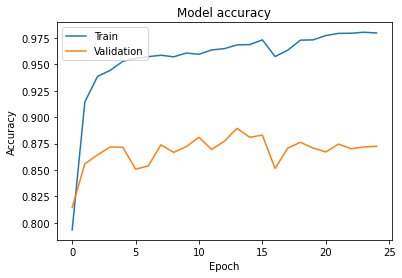

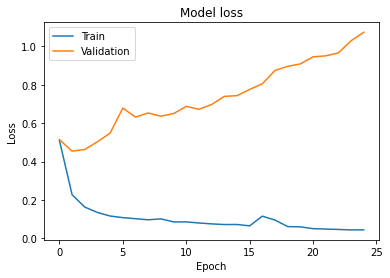

In [110]:
# Plot training accuracy & loss for CNN
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

93/93 [==============================] - 0s 3ms/step


<AxesSubplot:>

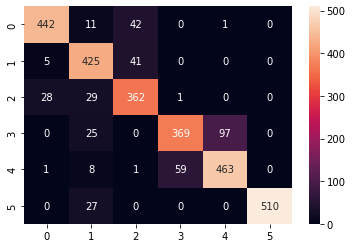

In [111]:
#confusion matrix for LSTM
y_pred = model_cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [112]:
# Obtain predictions for CNN 
y_pred_probs = model_cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
# Precision, Recall, and F1 Score
precision, recall, _, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
# Accuracy
acc = accuracy_score(y_true, y_pred)
# AUROC
# For multi-class, we will consider a micro-average
roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='micro')
print(f" CNN Model Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"Area Under the Curve (AUROC): {roc_auc:.4f}")

93/93 [==============================] - 0s 4ms/step
 CNN Model Metrics:
Precision: 0.8725
Recall: 0.8712
Accuracy: 0.8724
Area Under the Curve (AUROC): 0.9739


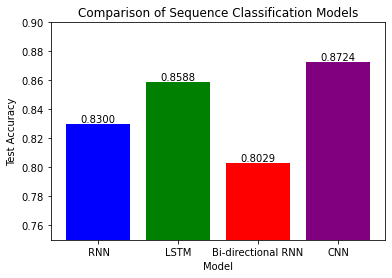

In [5]:
# List of model names and their test accuracies
model_names = [' RNN', 'LSTM', 'Bi-directional RNN', 'CNN']
test_accuracies = [0.8299965858459473, 0.8588395118713379, 0.8028503656387329, 0.8724126219749451]

# Create a bar plot for model comparison
plt.bar(model_names, test_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Sequence Classification Models')
plt.ylim(0.75, 0.9) 

for i, accuracy in enumerate(test_accuracies):
    plt.text(i, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.show()
